---
# Author: Michael Wood

---

 ---
 ## Problem 1 (Python)

### Questions:

1. Use the following data set: https://raw.githubusercontent.com/bforoura/IDS/main/HW5/wine_flag_all.csv
2. You will use the data set to demonstrate how we can use Naïve Bayes to classify a response variable. Specifically, we want to predict whether a wine is red or white based on whether the wine has high or low alcohol and sugar content.

3. Test for presence any missing attribute/target values and impute as necessary.

4. Encode all categoric attributes (e.g. label encoding or ordinal encoding, etc.)

5. Create contingency tables (cross tabulations) for:

  a. Type vs. alcohol content

  b. Type vs. Sugar content

6. Plot the two cross tabulations obtained in Step 5.

7. Use the tables from the previous step to calculate:
  
  a. The prior probability of Type = Red and Type = White.

  b. The probability of high and low alcohol content.
  
  c. The probability of high and low sugar content.

  d. The conditional probabilities p(Alcohol_flag = High ∣ Type = Red) and p(Alcohol_flag = Low ∣ Type = Red).

  e. The conditional probabilities p(Sugar_flag = High ∣ Type = Red) and p(Sugar_flag = Low ∣ Type = Red).

8. Create appropriate NB classifiers and record their accuracy on various training/test ratios, e.g., 80-20, 75-25, 70-30, 60-40, 50-50. Be sure to shuffle and stratify the data sets.

9. Plot the model accuracy measures obtained in Step 8.

10. Summarize your findings.
---

In [182]:
# 1. Importing/Reading the data file

import pandas as pd

wine_flag_all = pd.read_csv("https://raw.githubusercontent.com/bforoura/IDS/main/HW5/wine_flag_all.csv")

In [183]:
# 1. Displaying the data

wine_flag_all

,Type,Alcohol_flag,Sugar_flag
0,Red,High,High
1,Red,High,Low
2,Red,Low,High
3,Red,High,Low
4,Red,Low,Low
...,...,...,...
3340,White,High,High
3341,White,High,Low
3342,White,High,Low
3343,White,High,Low


In [188]:
# 3. Testing for any missing attributes/target values

null_values = wine_flag_all.isnull().sum()
na_values = wine_flag_all.isna().sum()

print("Null values:\n", null_values)
print("\nNA values:\n", na_values)

# No missing values found values found

Null values:
 Type            0
Alcohol_flag    0
Sugar_flag      0
dtype: int64

NA values:
 Type            0
Alcohol_flag    0
Sugar_flag      0
dtype: int64


In [189]:
# 4. Encoding all categoric attributes using label encoding

from sklearn import preprocessing
le = preprocessing.LabelEncoder()

# Saving the encoded dataframe here
encoded_wfaDF = pd.DataFrame()

# Encoding the categoric attributes
for i in range(0, wine_flag_all.shape[1]):
    if wine_flag_all.dtypes[i]=='object' or golfDF.dtypes[i]=='bool':
        encoded_wfaDF[wine_flag_all.columns[i]] = le.fit_transform(wine_flag_all[wine_flag_all.columns[i]])



print("=========================")
print("Original DF: ")
print(wine_flag_all)
print("=========================")
print("Encoded DF: ")
encoded_wfaDF

Original DF: 
       Type Alcohol_flag Sugar_flag
0       Red         High       High
1       Red         High        Low
2       Red          Low       High
3       Red         High        Low
4       Red          Low        Low
...     ...          ...        ...
3340  White         High       High
3341  White         High        Low
3342  White         High        Low
3343  White         High        Low
3344  White         High        Low

[3345 rows x 3 columns]
Encoded DF: 


,Type,Alcohol_flag,Sugar_flag
0,0,0,0
1,0,0,1
2,0,1,0
3,0,0,1
4,0,1,1
...,...,...,...
3340,1,0,0
3341,1,0,1
3342,1,0,1
3343,1,0,1


In [190]:
# 5 Creating the contingency table for type and alcohol content

# alcohol content will be columns, type will be rows

type_alcohol = pd.crosstab(wine_flag_all['Type'], wine_flag_all['Alcohol_flag'], margins = True)

type_alcohol

Alcohol_flag,High,Low,All
Type,,,
Red,485,600,1085
White,1176,1084,2260
All,1661,1684,3345


In [191]:
# 5 Creating the contingency table for type and sugar content

# sugar content will be columns, type will be rows

type_sugar = pd.crosstab(wine_flag_all['Type'], wine_flag_all['Sugar_flag'], margins = True)

type_sugar

Sugar_flag,High,Low,All
Type,,,
Red,237,848,1085
White,1382,878,2260
All,1619,1726,3345


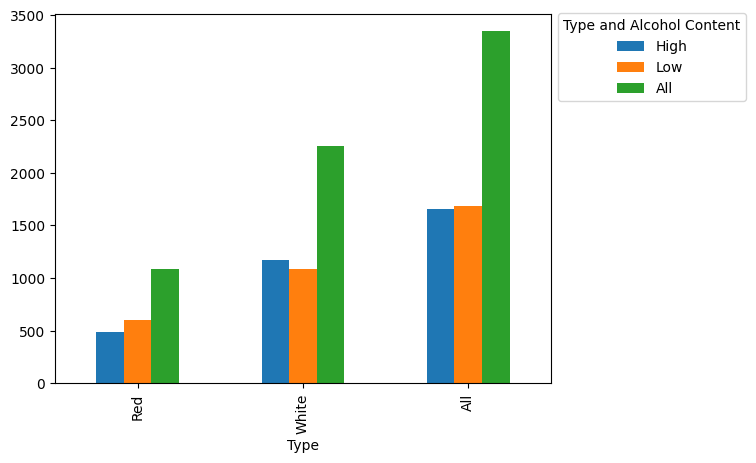

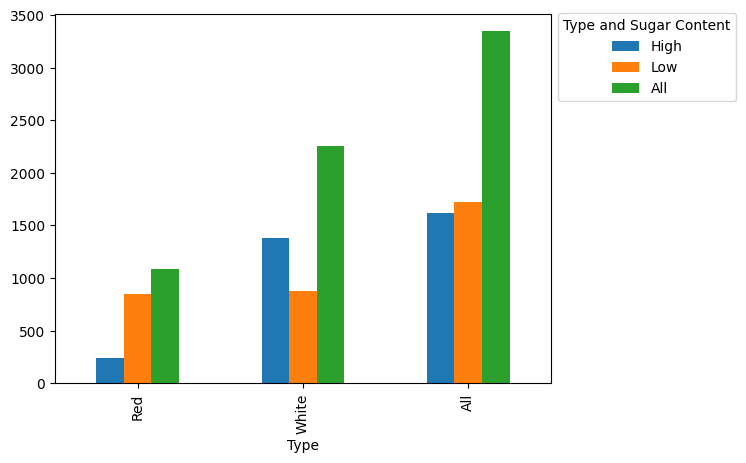

In [192]:
# 6. Plotting the contingency tables created in step 5

import matplotlib.pyplot as plt

# Plot for type and alcohol content contingency table
ax = type_alcohol.plot(kind="bar", stacked=False)
ax.legend(title='Type and Alcohol Content', bbox_to_anchor=(1, 1.02), loc='upper left')

# Plot for type and sugar content contingency table
ax2 = type_sugar.plot(kind="bar", stacked=False)
ax2.legend(title='Type and Sugar Content', bbox_to_anchor=(1, 1.02), loc='upper left')

In [193]:
# 7. Calculating the following using the tables previously created

# a. Prior probability of Red Type and White Type
prior_prob_red = type_alcohol.iloc[0, -1] / type_alcohol.iloc[-1, -1]
prior_prob_white = type_alcohol.iloc[1, -1] / type_alcohol.iloc[-1, -1]

# b. Probability of high and low alcohol content
prob_high_alcohol = type_alcohol.iloc[-1, 0] / type_alcohol.iloc[-1, -1]
prob_low_alcohol = type_alcohol.iloc[-1, 1] / type_alcohol.iloc[-1, -1]

# c. Probability of high and low sugar content
prob_high_sugar = type_sugar.iloc[-1, 0] / type_sugar.iloc[-1, -1]
prob_low_sugar = type_sugar.iloc[-1, 1] / type_sugar.iloc[-1, -1]

# d. Conditional probabilities for alcohol given Red Type
cond_prob_alcohol_red_high = type_alcohol.iloc[0, 0] / type_alcohol.iloc[0, -1]
cond_prob_alcohol_red_low = type_alcohol.iloc[0, 1] / type_alcohol.iloc[0, -1]

# e. Conditional probabilities for sugar given Red Type
cond_prob_sugar_red_high = type_sugar.iloc[0, 0] / type_sugar.iloc[0, -1]
cond_prob_sugar_red_low = type_sugar.iloc[0, 1] / type_sugar.iloc[0, -1]

# Print the results
print("a. Prior probability of Red Type:", prior_prob_red)
print("   Prior probability of White Type:", prior_prob_white)
print("b. Probability of High alcohol content:", prob_high_alcohol)
print("   Probability of Low alcohol content:", prob_low_alcohol)
print("c. Probability of High sugar content:", prob_high_sugar)
print("   Probability of Low sugar content:", prob_low_sugar)
print("d. Conditional probability of High alcohol content given Red Type:", cond_prob_alcohol_red_high)
print("   Conditional probability of Low alcohol content given Red Type:", cond_prob_alcohol_red_low)
print("e. Conditional probability of High sugar content given Red Type:", cond_prob_sugar_red_high)
print("   Conditional probability of Low sugar content given Red Type:", cond_prob_sugar_red_low)

a. Prior probability of Red Type: 0.3243647234678625
   Prior probability of White Type: 0.6756352765321375
b. Probability of High alcohol content: 0.49656203288490286
   Probability of Low alcohol content: 0.5034379671150971
c. Probability of High sugar content: 0.48400597907324366
   Probability of Low sugar content: 0.5159940209267564
d. Conditional probability of High alcohol content given Red Type: 0.4470046082949309
   Conditional probability of Low alcohol content given Red Type: 0.5529953917050692
e. Conditional probability of High sugar content given Red Type: 0.2184331797235023
   Conditional probability of Low sugar content given Red Type: 0.7815668202764977


In [195]:
# 8. Creating appropriate NB classifiers and recording their accuracy on various training/testing ratios

# Generating various Naive Bayes models
from sklearn.naive_bayes import GaussianNB, MultinomialNB, CategoricalNB, BernoulliNB
from sklearn.model_selection import train_test_split

# Create a Gaussian NB Classifier.
NBmodel = GaussianNB()

# Prepare input and output for learning
X = encoded_wfaDF.iloc[:,1:3]
y = encoded_wfaDF.iloc[:,0]

# Shuffling and stratifying the data
X_train_80_20, X_test_80_20, y_train_80_20, y_test_80_20 = \
    train_test_split(X, y, random_state=42, shuffle=True, test_size=0.8, stratify=y)

# Display the sets
print("Sets for the 80-20 training/test ratio:")
print(X_train_80_20)
print(X_test_80_20)
print("=========================\n")

# Shuffling and stratifying the data
X_train_75_25, X_test_75_25, y_train_75_25, y_test_75_25 = \
    train_test_split(X, y, random_state=35, shuffle=True, test_size=0.75, stratify=y)

# Display the sets
print("Sets for the 75-25 training/test ratio:")
print(X_train_75_25)
print(X_test_75_25)
print("=========================\n")

# Shuffling and stratifying the data
X_train_70_30, X_test_70_30, y_train_70_30, y_test_70_30 = \
    train_test_split(X, y, random_state=56, shuffle=True, test_size=0.7, stratify=y)

# Display the sets
print("Sets for the 70-30 training/test ratio:")
print(X_train_70_30)
print(X_test_70_30)
print("=========================\n")

# Shuffling and stratifying the data
X_train_60_40, X_test_60_40, y_train_60_40, y_test_60_40 = \
    train_test_split(X, y, random_state=104, shuffle=True, test_size=0.6, stratify=y)

# Display the sets
print("Sets for the 60-40 training/test ratio:")
print(X_train_60_40)
print(X_test_60_40)
print("=========================\n")

# Shuffling and stratifying the data
X_train_50_50, X_test_50_50, y_train_50_50, y_test_50_50 = \
    train_test_split(X, y, random_state=81, shuffle=True, test_size=0.5, stratify=y)

# Display the sets
print("Sets for the 50-50 training/test ratio:")
print(X_train_50_50)
print(X_test_50_50)
print("=========================\n")

Sets for the 80-20 training/test ratio:
      Alcohol_flag  Sugar_flag
56               0           0
2901             0           1
545              1           1
937              1           0
2265             1           1
...            ...         ...
544              0           1
2034             1           0
2953             0           1
683              0           1
1613             1           0

[669 rows x 2 columns]
      Alcohol_flag  Sugar_flag
2673             0           1
519              0           1
152              0           0
1982             1           0
808              0           1
...            ...         ...
2418             1           1
6                0           1
3005             0           0
3330             0           0
2804             0           1

[2676 rows x 2 columns]

Sets for the 75-25 training/test ratio:
      Alcohol_flag  Sugar_flag
1817             1           0
2323             1           1
3191             0           1
98

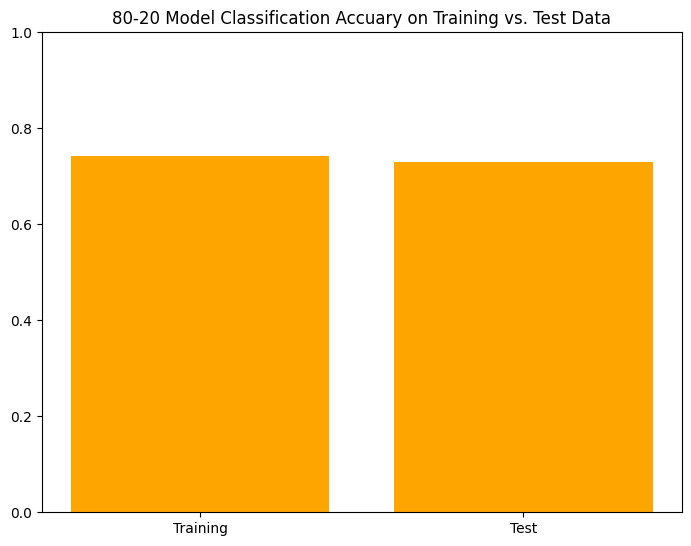

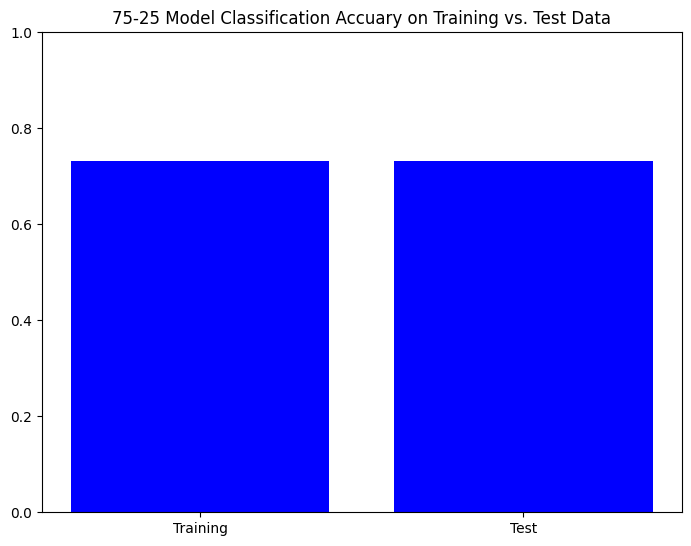

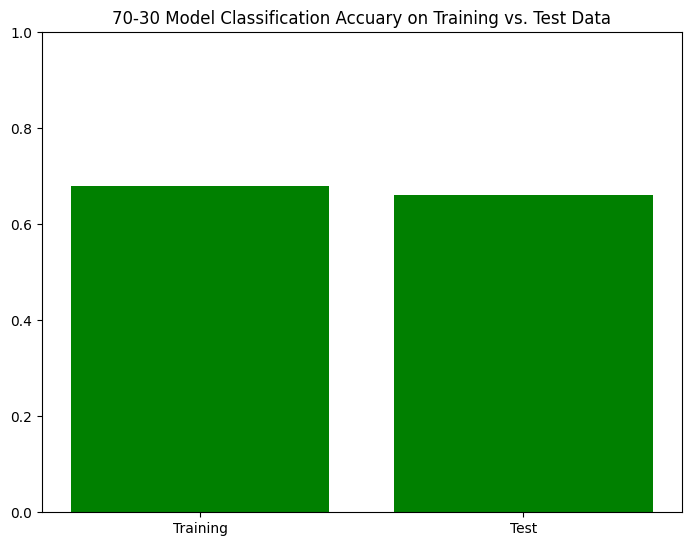

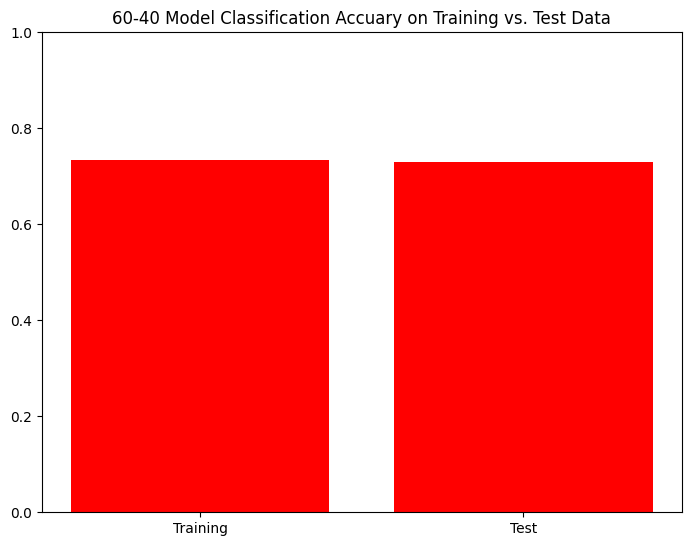

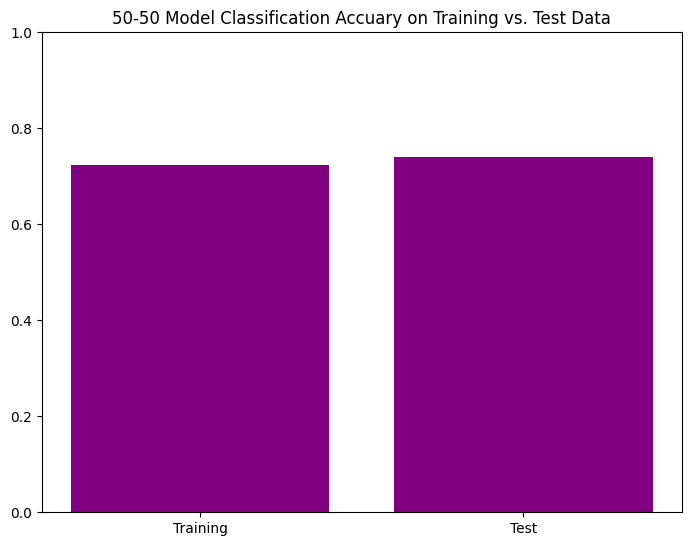

In [196]:
# 9. Plotting the model accuracy measures obtained in step 8

import matplotlib.pyplot as plt

# Train the model for 80-20
NBmodel.fit(X_train_80_20, y_train_80_20)

# Calculate model accuracy on both training and test data for 80-20 model
labels = ["Training", "Test"]
scores = [NBmodel.score(X_train_80_20, y_train_80_20), NBmodel.score(X_test_80_20, y_test_80_20)]

# Plot the accuracy claues
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.set_title('80-20 Model Classification Accuary on Training vs. Test Data')
ax.bar(labels, scores, color="orange")
ax.set_ylim(0, 1)
plt.show()

# Train the model for 75-25
NBmodel.fit(X_train_75_25, y_train_75_25)

# Calculate model accuracy on both training and test data for 75-25 model
labels = ["Training", "Test"]
scores = [NBmodel.score(X_train_75_25, y_train_75_25), NBmodel.score(X_test_75_25, y_test_75_25)]

# Plot the accuracy claues
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.set_title('75-25 Model Classification Accuary on Training vs. Test Data')
ax.bar(labels, scores, color="blue")
ax.set_ylim(0, 1)
plt.show()

# Train the model for 70-30
NBmodel.fit(X_train_70_30, y_train_70_30)

# Calculate model accuracy on both training and test data for 70-30 model
labels = ["Training", "Test"]
scores = [NBmodel.score(X_train_70_30, y_train_70_30), NBmodel.score(X_test_70_30, y_test_70_30)]

# Plot the accuracy claues
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.set_title('70-30 Model Classification Accuary on Training vs. Test Data')
ax.bar(labels, scores, color="green")
ax.set_ylim(0, 1)
plt.show()

# Train the model for 60-40
NBmodel.fit(X_train_60_40, y_train_60_40)

# Calculate model accuracy on both training and test data for 60-40 model
labels = ["Training", "Test"]
scores = [NBmodel.score(X_train_60_40, y_train_60_40), NBmodel.score(X_test_60_40, y_test_60_40)]

# Plot the accuracy claues
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.set_title('60-40 Model Classification Accuary on Training vs. Test Data')
ax.bar(labels, scores, color="red")
ax.set_ylim(0, 1)
plt.show()

# Train the model for 50-50
NBmodel.fit(X_train_50_50, y_train_50_50)

# Calculate model accuracy on both training and test data for 50-50 model
labels = ["Training", "Test"]
scores = [NBmodel.score(X_train_50_50, y_train_50_50), NBmodel.score(X_test_50_50, y_test_50_50)]

# Plot the accuracy claues
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.set_title('50-50 Model Classification Accuary on Training vs. Test Data')
ax.bar(labels, scores, color="purple")
ax.set_ylim(0, 1)
plt.show()

---
## 10. Summarize your findings.
---
1. I used the data set from the link provided.

2. You will use the data set to demonstrate how we can use Naïve Bayes to classify a response variable. Specifically, we want to predict whether a wine is red or white based on whether the wine has high or low alcohol and sugar content.

3. I tested for any null or na values in the data and found none.

4. I encoded all the categoric attributes, which was all of them. I then displayed the encoded data frame. For the type, the data was split between Red for 0 and White for 1. For alcohol content, the data was split between High for 0 and Low for 1. Sugar content was split the same way as alcohol content.

5. I created the contingency table for the type and alcohol content attributes. I used type for the rows and alcohol content for the columns. I also created the contingency table for the type and sugar content attributes. I used type  for the rows and sugar content for the columns.

6. I plotted the two contingency tables I created in step 5. It seems that-for both alcohol and sugar content-Red wine had more Low content and White wine had more High content.

7. I used the tables previously created to calculate the probabilities and got the following results:

        a. Prior probability of Red Type: 0.3243647234678625
           Prior probability of White Type: 0.6756352765321375
        b. Probability of High alcohol content: 0.49656203288490286
           Probability of Low alcohol content: 0.5034379671150971
        c. Probability of High sugar content: 0.48400597907324366
           Probability of Low sugar content: 0.5159940209267564
        d. Conditional probability of High alcohol content given Red Type: 0.4470046082949309
           Conditional probability of Low alcohol content given Red Type: 0.5529953917050692
        e. Conditional probability of High sugar content given Red Type: 0.2184331797235023
           Conditional probability of Low sugar content given Red Type: 0.7815668202764977


8. I created Gaussian NB classifiers and recorded their accuracy on 5 different training/test ratios (80-20, 75-25, 70-30, 60-40, and 50-50). I shuffled the data with different random states and stratified the data with the y values (the Type attribute). Since we want to predict whether wine is red or white based on whether the wine has high or low alcohol and sugar content, I made the alcohol and sugar content attributes the x-axis and the type attribute the y-axis.

9. I plotted each of the classification accuracies for training and testing. It seems that there is an accuracy rating between 0.6 and 0.8 for all the ratios used. The accuracies for training and testing seem to be about the same for all ratios used as well, which may indicate that the model is somewhat good for making predictions. on the data sets.
---